# Machine learning assignment 

## Let's use the BoxDetect package to crop images

BoxDetect is a Python package based on OpenCV which allows you to easily detect rectangular shapes like character or checkbox boxes on scanned forms.

Main purpose of this library is to provide helpful functions for processing document images like bank forms, applications, etc. and extract regions where character boxes or tick/check boxes are present.

In [131]:
from boxdetect import config

file_name = 'Files/Raw_Image.jpg'

cfg = config.PipelinesConfig()

# important to adjust these values to match the size of boxes on your image
cfg.width_range = (10,100)
cfg.height_range = (10,100)

# the more scaling factors the more accurate the results but also it takes more time to processing
# too small scaling factor may cause false positives
# too big scaling factor will take a lot of processing time
cfg.scaling_factors = [10]

# w/h ratio range for boxes/rectangles filtering
cfg.wh_ratio_range = (0.5, 1.7)

# group_size_range starting from 2 will skip all the groups
# with a single box detected inside (like checkboxes)
cfg.group_size_range = (2, 100)

# num of iterations when running dilation tranformation (to engance the image)
cfg.dilation_iterations = 0

In [95]:
from boxdetect.pipelines import get_boxes
import matplotlib.pyplot as plt

rects, grouping_rects, image, output_image = get_boxes(
    file_name, cfg=cfg, plot=False)

Processing file:  Files/Raw_Image.jpg


In [96]:
print(rects)

[[12 15 24 24]]


In [97]:
print(grouping_rects)

[]


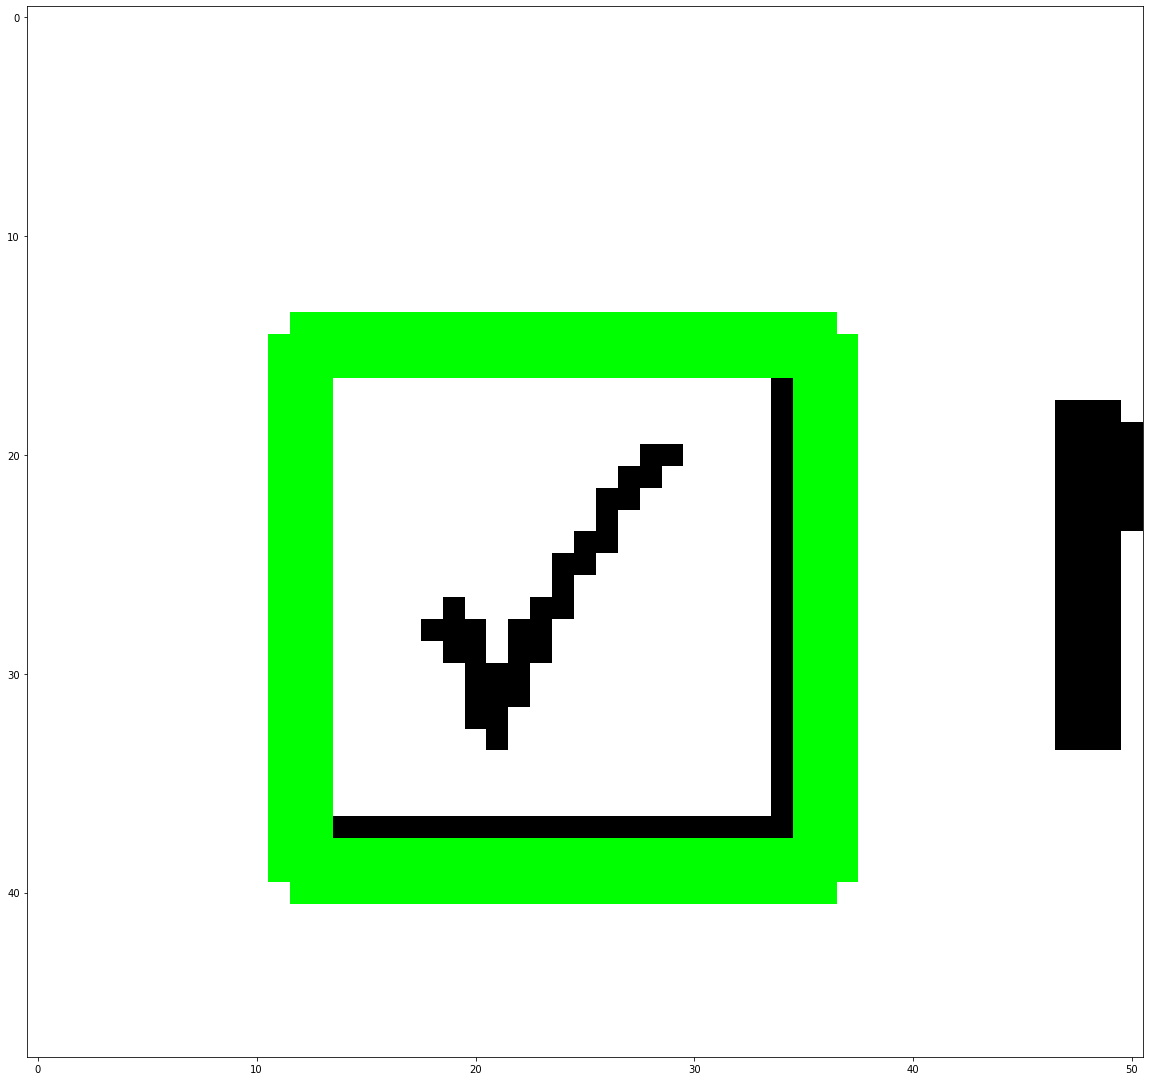

In [98]:
plt.figure(figsize=(20,20))
plt.imshow(output_image)
plt.show()


In [99]:
# limit down the grouping algorithm to just singular boxes (e.g. checkboxes)
cfg.group_size_range = (1, 1)

In [100]:
from boxdetect.pipelines import get_checkboxes

checkboxes = get_checkboxes(
    file_name, cfg=cfg, px_threshold=0.1, plot=False, verbose=True)

Processing file:  Files/Raw_Image.jpg
----------------------------------
nonzero_px_count:  33
all_px_count:  361
nonzero_px_count / all_px_count =  0.09141274238227147
----------------------------------


/Users/isita/Downloads/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Output object type:  <class 'numpy.ndarray'>
Checkbox bounding rectangle (x,y,width,height):  (12, 15, 25, 25)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


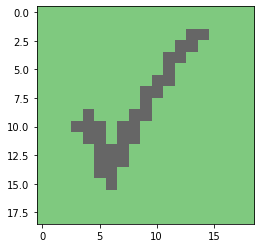

In [101]:
print("Output object type: ", type(checkboxes))
for checkbox in checkboxes:
    print("Checkbox bounding rectangle (x,y,width,height): ", checkbox[0])
    print("Result of `contains_pixels` for the checkbox: ", checkbox[1])
    print("Display the cropout of checkbox:")
#     print(checkbox)
    plt.imshow(checkbox[2],cmap='Accent')
    plt.show()

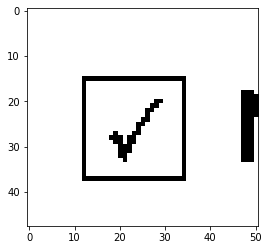

In [102]:
import cv2
img = cv2.imread(file_name) 
plt.imshow(img)
plt.show()

## cropping image based on the rectangular coordinates retrieved

Output object type:  <class 'numpy.ndarray'>
Checkbox bounding rectangle (x,y,width,height):  (19, 13, 22, 22)
19 13 22 22
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


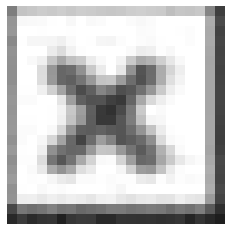

In [130]:
print("Output object type: ", type(checkboxes))
for checkbox in checkboxes:
    print("Checkbox bounding rectangle (x,y,width,height): ", checkbox[0])
    x,y,w,h = [int(i) for i in checkbox[0]]
    print(x,y,w,h)
    print("Result of `contains_pixels` for the checkbox: ", checkbox[1])
    print("Display the cropout of checkbox:")
#     print(checkbox)
    crop_img = img[y:y+h, x:x+w]
#     print(crop_img)
    plt.imshow(crop_img)
    plt.axis('off')
    # saving the image
    plt.savefig('clean_image.jpg')
    plt.show()

In [104]:
l=[]
for i in range(1,10):
    l.append('Files/Raw_Dataset/img-'+str(i)+'.jpg')
print(l)

['Files/Raw_Dataset/img-1.jpg', 'Files/Raw_Dataset/img-2.jpg', 'Files/Raw_Dataset/img-3.jpg', 'Files/Raw_Dataset/img-4.jpg', 'Files/Raw_Dataset/img-5.jpg', 'Files/Raw_Dataset/img-6.jpg', 'Files/Raw_Dataset/img-7.jpg', 'Files/Raw_Dataset/img-8.jpg', 'Files/Raw_Dataset/img-9.jpg']


Processing file:  Files/Raw_Dataset/img-1.jpg
Processing file:  Files/Raw_Dataset/img-2.jpg
----------------------------------
nonzero_px_count:  33
all_px_count:  324
nonzero_px_count / all_px_count =  0.10185185185185185
----------------------------------
Checkbox bounding rectangle (x,y,width,height):  (12, 15, 24, 24)
12 15 24 24
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


/Users/isita/Downloads/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


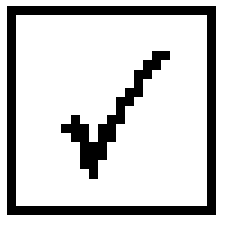

Processing file:  Files/Raw_Dataset/img-3.jpg
----------------------------------
nonzero_px_count:  85
all_px_count:  361
nonzero_px_count / all_px_count =  0.23545706371191136
----------------------------------
Checkbox bounding rectangle (x,y,width,height):  (12, 11, 25, 25)
12 11 25 25
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


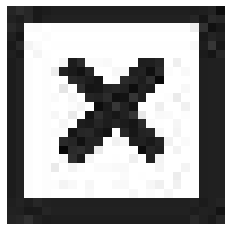

Processing file:  Files/Raw_Dataset/img-4.jpg
----------------------------------
nonzero_px_count:  96
all_px_count:  361
nonzero_px_count / all_px_count =  0.2659279778393352
----------------------------------
Checkbox bounding rectangle (x,y,width,height):  (12, 13, 25, 25)
12 13 25 25
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


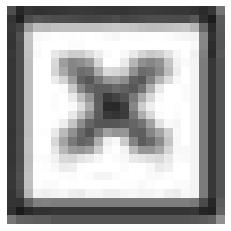

Processing file:  Files/Raw_Dataset/img-5.jpg
----------------------------------
nonzero_px_count:  96
all_px_count:  361
nonzero_px_count / all_px_count =  0.2659279778393352
----------------------------------
Checkbox bounding rectangle (x,y,width,height):  (12, 13, 25, 25)
12 13 25 25
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


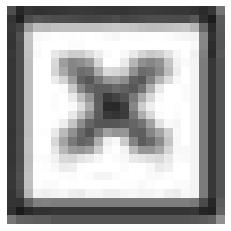

Processing file:  Files/Raw_Dataset/img-6.jpg
Processing file:  Files/Raw_Dataset/img-7.jpg
----------------------------------
nonzero_px_count:  0
all_px_count:  2600
nonzero_px_count / all_px_count =  0.0
----------------------------------
Checkbox bounding rectangle (x,y,width,height):  (20, 35, 72, 70)
20 35 72 70
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


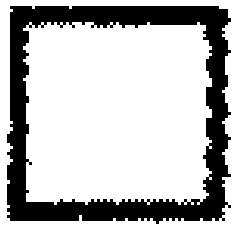

Processing file:  Files/Raw_Dataset/img-8.jpg
----------------------------------
nonzero_px_count:  122
all_px_count:  256
nonzero_px_count / all_px_count =  0.4765625
----------------------------------
Checkbox bounding rectangle (x,y,width,height):  (19, 13, 22, 22)
19 13 22 22
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


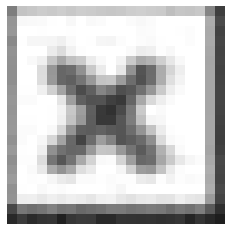

Processing file:  Files/Raw_Dataset/img-9.jpg
----------------------------------
nonzero_px_count:  122
all_px_count:  256
nonzero_px_count / all_px_count =  0.4765625
----------------------------------
Checkbox bounding rectangle (x,y,width,height):  (19, 13, 22, 22)
19 13 22 22
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


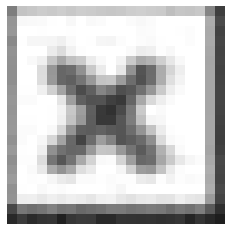

In [133]:
from boxdetect.pipelines import get_checkboxes
n=0
for i in l:
    n=n+1
    checkboxes = get_checkboxes(
    i, cfg=cfg, px_threshold=0.01, plot=False, verbose=True)
#     print("Output object type: ", type(checkboxes))
    for checkbox in checkboxes:
        print("Checkbox bounding rectangle (x,y,width,height): ", checkbox[0])
        x,y,w,h = [int(i) for i in checkbox[0]]
        print(x,y,w,h)
        print("Result of `contains_pixels` for the checkbox: ", checkbox[1])
        print("Display the cropout of checkbox:")
#       print(checkbox)
        img = cv2.imread(i) 
        crop_img = img[y:y+h, x:x+w]
#         print(crop_img)
        plt.imshow(crop_img)
        plt.axis('off')
        # saving the image
        plt.savefig('clean_image'+str(n)+'.jpg')
        plt.show()

Note : as we keep changing the cfg.scaling_factors parameter we'll get the results accordingly.
a large scaling factor will take more time to process, We cannot be sure if there's an optinum scaling factor which fits for all the images. We can increase or decrease the value to check out the results.

for 0.8 scaling factor we can get the output of the first image
10 or 0.3 scaling factor to get the 7th cleaned image. we can also provide multiple scaling factors.